University of Central Asia 
Naryn, Kyrgyzstan 


**Data Science Project: Air quality prediction in Bishkek using different machine learning models.** 

**Scenario 1: Train and Test split by random shuffling without considering seasonal values.**

By Meerbek Akimzhanov, Kanykei Mairambekova, Rysgul Nurbekova 

Introduction: In our project, we decided to predict the air pollution index (AQIUS) based on the temperature, PM2.5 and PM10 levels, NO2 gas level on the air, and the humidity to preserve people's health by giving them an early warning about dangerous contaminants in the air. 



This prediction can be helpful in making the warning apps for the public: people can learn the air pollution level by hour beforehand and decide whether they need to go out at that particular time or not. 





The dataset originally was taken from http://data.movegreen.kg/ 


**Step 1:** importing the dataset

In [1]:
import pandas as pd
path = "https://project.meerbekakimjano.repl.co/real_data.csv"
data = pd.read_csv(path)
# print(data)
data.head(100)
data.tail()

,Date and time,PM1 (mkg/m³),PM10(mkg/m³),PM2.5(mkg/m³),NO2(mkg/m³),Temperature(°C),Humidity(%),Atmospheric Pressure,AQIUS
15963,2/9/2022 20:00,14.39,43.23,76.34,29.99,-0.97,84.19,897.32,152.54
15964,2/9/2022 21:00,11.77,38.49,87.06,30.99,-2.08,83.99,896.93,159.26
15965,2/9/2022 22:00,12.39,55.00,94.61,27.83,-3.09,82.93,896.70,161.74
15966,2/9/2022 23:00,7.37,28.10,64.37,26.86,-3.88,81.31,896.42,137.55
15967,2/10/2022 0:00,10.59,37.52,70.93,25.80,-4.51,79.35,896.06,139.79


**Step 2:** Pre-processing: handling the missing values and making feature selection. 

a) The missing values were deleted as their amount was too high in order to eliminate the bias. Even though, half of the data was deleted because of containing the missing values, the amount of data in the another half will be relatively enough to make the prediction modeling without bias. 



In [92]:
data.dropna(inplace=True)
# print(data)
data.head(100)

,Date and time,PM1 (mkg/m³),PM10(mkg/m³),PM2.5(mkg/m³),NO2(mkg/m³),Temperature(°C),Humidity(%),Atmospheric Pressure,AQIUS
7087,2/5/2021 0:00,8.56,103.33,84.40,15.95,-0.92,85.69,1021.95,266.08
7088,2/5/2021 1:00,7.08,89.57,74.65,16.79,-0.26,81.55,1021.26,217.00
7089,2/5/2021 2:00,5.61,81.22,61.84,14.04,-0.03,80.00,1020.97,195.97
7090,2/5/2021 3:00,5.84,49.68,40.19,13.00,0.00,80.00,1021.00,183.41
7091,2/5/2021 4:00,4.61,38.28,31.22,15.71,-0.78,80.00,1020.22,146.19
...,...,...,...,...,...,...,...,...,...
7182,2/8/2021 23:00,5.68,61.42,49.00,23.33,6.75,94.75,1016.00,128.03
7183,2/9/2021 0:00,9.35,69.64,54.42,21.19,7.00,93.00,1016.00,115.51
7184,2/9/2021 1:00,9.03,51.25,41.53,20.27,2.38,98.30,1017.51,106.41
7185,2/9/2021 2:00,6.56,42.04,36.07,19.04,1.00,100.00,1018.00,88.92


b) Then, we performed the feature selection in order to check the relevance of input attributes(features) to our target variable. That was made to reduce the number of unrelevant variables (variables that have very small or even no effect on the target) to increrase the accuracy of the model and reduce the overfitting.




So, we applied the Pearson correlation method to see the correlation between each independent variable and the dependent one. 

In [93]:
data.corr()

,PM1 (mkg/m³),PM10(mkg/m³),PM2.5(mkg/m³),NO2(mkg/m³),Temperature(°C),Humidity(%),Atmospheric Pressure,AQIUS
PM1 (mkg/m³),1.000000,0.337964,0.366654,0.034979,-0.350685,0.187297,0.114792,0.735317
PM10(mkg/m³),0.337964,1.000000,0.257730,-0.060167,0.234672,-0.220715,-0.031002,0.404323
PM2.5(mkg/m³),0.366654,0.257730,1.000000,0.093319,-0.140445,0.055410,0.082044,0.614920
NO2(mkg/m³),0.034979,-0.060167,0.093319,1.000000,-0.057718,0.084989,0.006696,0.057020
Temperature(°C),-0.350685,0.234672,-0.140445,-0.057718,1.000000,-0.859016,-0.218058,-0.565968
Humidity(%),0.187297,-0.220715,0.055410,0.084989,-0.859016,1.000000,0.215104,0.415467
Atmospheric Pressure,0.114792,-0.031002,0.082044,0.006696,-0.218058,0.215104,1.000000,0.158278
AQIUS,0.735317,0.404323,0.614920,0.057020,-0.565968,0.415467,0.158278,1.000000


After calculating the correlations, we have deleted the attributes that have zero or close to zero correlation with the target variable as they have very small relevancy to the target variable. They are NO2(mkg/m³) and Atmospheric Pressure. 

In [2]:
data = data.drop(['Atmospheric Pressure'], axis=1)
data = data.drop(['NO2(mkg/m³)'], axis=1)
data.head()

(15968, 7)

**Step 3:** Making descriptive statistics for each column to get the basic information (summary) about variables in a dataset. 







In [95]:
data.describe()

,PM1 (mkg/m³),PM10(mkg/m³),PM2.5(mkg/m³),Temperature(°C),Humidity(%),AQIUS
count,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000,8881.000000
mean,8.725450,60.386243,74.685496,13.752384,52.640448,100.691796
std,7.761667,32.807347,88.461795,11.721253,22.523243,54.604009
min,0.000000,3.060000,0.870000,-17.500000,7.860000,3.630000
25%,5.050000,38.950000,19.890000,3.640000,33.420000,58.620000
50%,6.160000,57.990000,45.870000,12.510000,49.970000,87.240000
75%,8.600000,76.990000,94.970000,23.280000,72.570000,130.410000
max,84.360000,515.140000,2953.230000,43.110000,100.000000,500.000000


**Step 4:** Splitting the data into training (80%) and testing (20%) after random shuffling. 

In order to eliminate the seasonal bias, random shuffling should be performed so that the data will get training observations from each season. 


However, we have also considered reducing bias by splitting the dataset into training (80%) and testing (20%) equally by every season. This scenario is found in our second notebook (Seasonal DS_Project). 

In [96]:
# assigning independed and depended variables
X = data.iloc[:, 1:-1].values
y = data.iloc[:, 6].values

#Training and Testing Data (divide the data into two part)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20, random_state=50, shuffle = True)


# print(X_train)
# print(y_train)

**Step 5:** Applying different regressional models and calculating the accurancies with MAE.



For the model application, we have tested five different regression models (Linear Regression, SVR, KNeighboursRegression, XGBoost, and ANN) to compare their efficiencies in terms of accuracy and time. 

a. First, Linear Regression model was applied on the dataset with its MAE calculated. 

Accuracy:  79.47914187705146


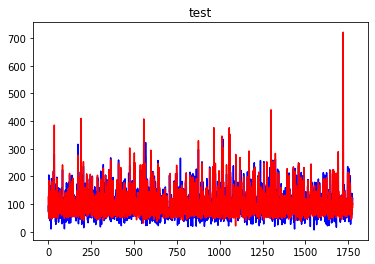

In [97]:
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, roc_auc_score, roc_curve, auc


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
MAE = mean_absolute_percentage_error(y_test, y_pred)
print("Accuracy: ", 100*(1-MAE))
acc_lr = 100*(1-MAE)

def plotGraph(y_test,y_pred,regressorName): #graph plotting function to display the actual and predicted values
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.plot(range(len(y_test)), y_test, color='blue', label = 'original')
    plt.plot(range(len(y_pred)), y_pred, color='red', label = 'predicted')
    plt.title(regressorName)
    plt.show()
    return


plotGraph(y_test, y_pred, "test")

# # print(y_test)
# # print(y_pred)
# y_pred.shape

b. Second, KNeighborsRegressor was applied on the model. 

Accuracy:  93.27713584498183


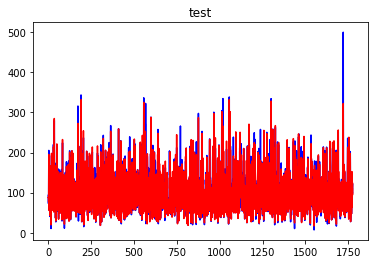

In [98]:
from sklearn.neighbors import KNeighborsRegressor
lr = KNeighborsRegressor()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
MAE = mean_absolute_percentage_error(y_test, y_pred)
print("Accuracy: ", 100*(1-MAE))

acc_knr = 100*(1-MAE)

plotGraph(y_test, y_pred, "test")

c. Third, Support Vector Regressor (SVR) was applied on the model. 

Accuracy:  80.37625334188037


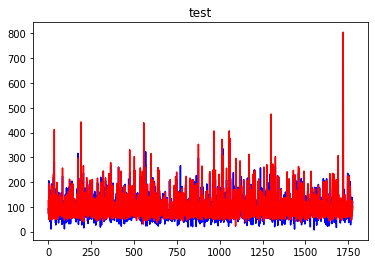

In [99]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error
lr = SVR(kernel='linear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
MAE = mean_absolute_percentage_error(y_test, y_pred)
print("Accuracy: ", 100*(1-MAE))
acc_svr = 100*(1-MAE)

plotGraph(y_test, y_pred, "test")

d. Fourth, XGBoost was applied on the model with its parameter values being tested for different values (max_depth abd n_estimators). That was done to find the parameter values that give the best accuracy. Moreover, while defining different values for the parameters, we have considered the treshhold values which allow the model to not overfit.  

The best accuracy is: 93.54862831461342 with max depth and n_estimator == 10 and 100


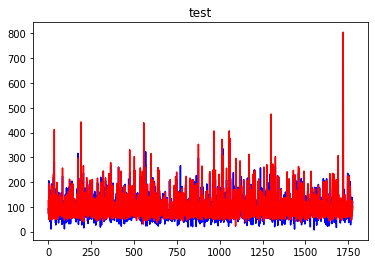

In [100]:
import numpy as np
import xgboost as xgb
import sklearn.metrics as metrics
def FindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    max_depth_var = [2, 7, 10, 15, 20]
    n_estimators_var = [10, 50, 100, 1000]
    max = 0;
    string_data = ""
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for max_depth_trial in max_depth_var:
        for n_estimators_trial in n_estimators_var:
            TrialNumber+=1
            xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.8, learning_rate = 0.3, max_depth = max_depth_trial, alpha = 10, n_estimators = n_estimators_trial)
            xg_reg.fit(X_train, y_train)
            preds = xg_reg.predict(X_test)
            MAE = metrics.mean_absolute_error(y_test, preds)
            if max < 100-MAE:
                max = 100-MAE
                string_data = str(max_depth_trial)+' and '+str(n_estimators_trial)
            
    print(f'The best accuracy is: {max} with max depth and n_estimator == ' + string_data)
    return max

acc_xgb=FindBestParams(X_train, y_train, X_test, y_test)


plotGraph(y_test, y_pred, "test")

e. Last, we decided to apply the ANN. For that, we idetified the different values for parameters (batch size and epoch) to identify which ones will give us the best result. Moreover, we have implemented RELU and Linear Regression activation functions in hidden leayers as our dataset variables are at the same time have strong and weak correlations. 



The outputs have shown very long time of execution and low accuracy (33.42%). So, by applying and testing ANN on our dataset, we made sure that this is not a good approach. For the rapidness of execuation, we have commented all the lines of ANN model, but, in case, you can uncomment them anytime and run to see the evidence. 

In [101]:
# # importing the libraries
# from keras.models import Sequential
# from keras.layers import Dense
# import numpy as np

# def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
#     # Defining the list of hyper parameters to try
#     batch_size_list=[5, 10, 15, 20]
#     epoch_list  =   [5, 10, 50, 100]
#     max = 0;
#     string_data = ""
#     y_pred = []
#     import pandas as pd
#     SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
#     # initializing the trials
#     TrialNumber=0
#     for batch_size_trial in batch_size_list:
#         for epochs_trial in epoch_list:
#             TrialNumber+=1
#             # create ANN model
#             model = Sequential()
#             # Defining the first layer of the model
#             model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
#             # Defining the Second layer of the model
#             model.add(Dense(units=5, kernel_initializer='normal', activation='linear'))
 
#             # The output neuron is a single fully connected node 
#             # Since we will be predicting a single number
#             model.add(Dense(1, kernel_initializer='normal'))
 
#             # Compiling the model
#             model.compile(loss='mean_squared_error', optimizer='adam')
 
#             # Fitting the ANN to the Training set
#             model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
            
#             MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
#             if max < 100-MAPE:
#                 max = 100-MAPE
#                 string_data = str(batch_size_trial)+' and '+str(epochs_trial)
                

#     print(f'The best accuracy is: {max} with batch size and epoch == ' + string_data)
#     return max,y_pred;
 
# acc_ann,y_pred = FunctionFindBestParams(X_train, y_train, X_test, y_test)
acc_ann = 33.42

**Step 6:** Evalutation 

Since while applying the models, we have also tested for the accuracy using Mean Absolute Error, we visualized the comparison of the accuracies of algorithms to demonstrate which model fits (predicts) best. 

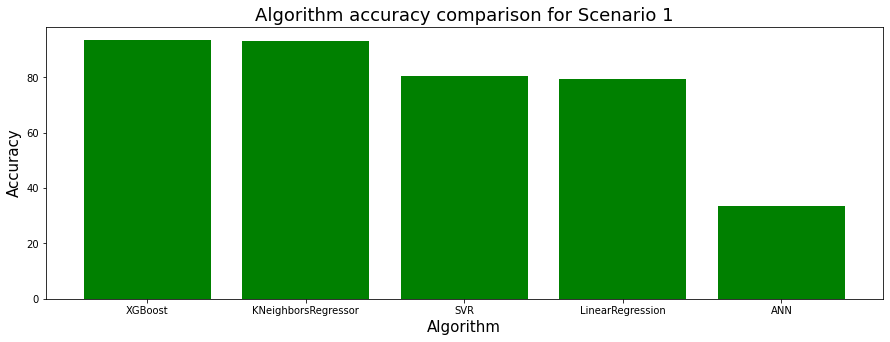

[93.54862831461342, 93.27713584498183, 80.37625334188037, 79.47914187705146, 33.42]


In [103]:
labels= ['LinearRegression','SVR','KNeighborsRegressor','XGBoost', 'ANN']
acc_list = [acc_lr,acc_svr,acc_knr,acc_xgb, acc_ann]
length=np.arange(len(labels))
accuracy = pd.DataFrame({"Algorithm":labels,"Accuracy":acc_list})
accuracy.sort_values(by='Accuracy',ascending=False,inplace=True)

plt.figure(figsize=(15,5))
plt.title("Algorithm accuracy comparison for Scenario 1", fontsize=18)
plt.bar(length,accuracy["Accuracy"],color="green")
plt.xticks(length,accuracy["Algorithm"])
plt.xlabel('Algorithm',fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.show()
acc_list.sort(reverse = True)
print(acc_list)

All in all, XGBoost algorithm fits best to our dataset. 